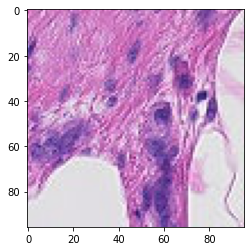

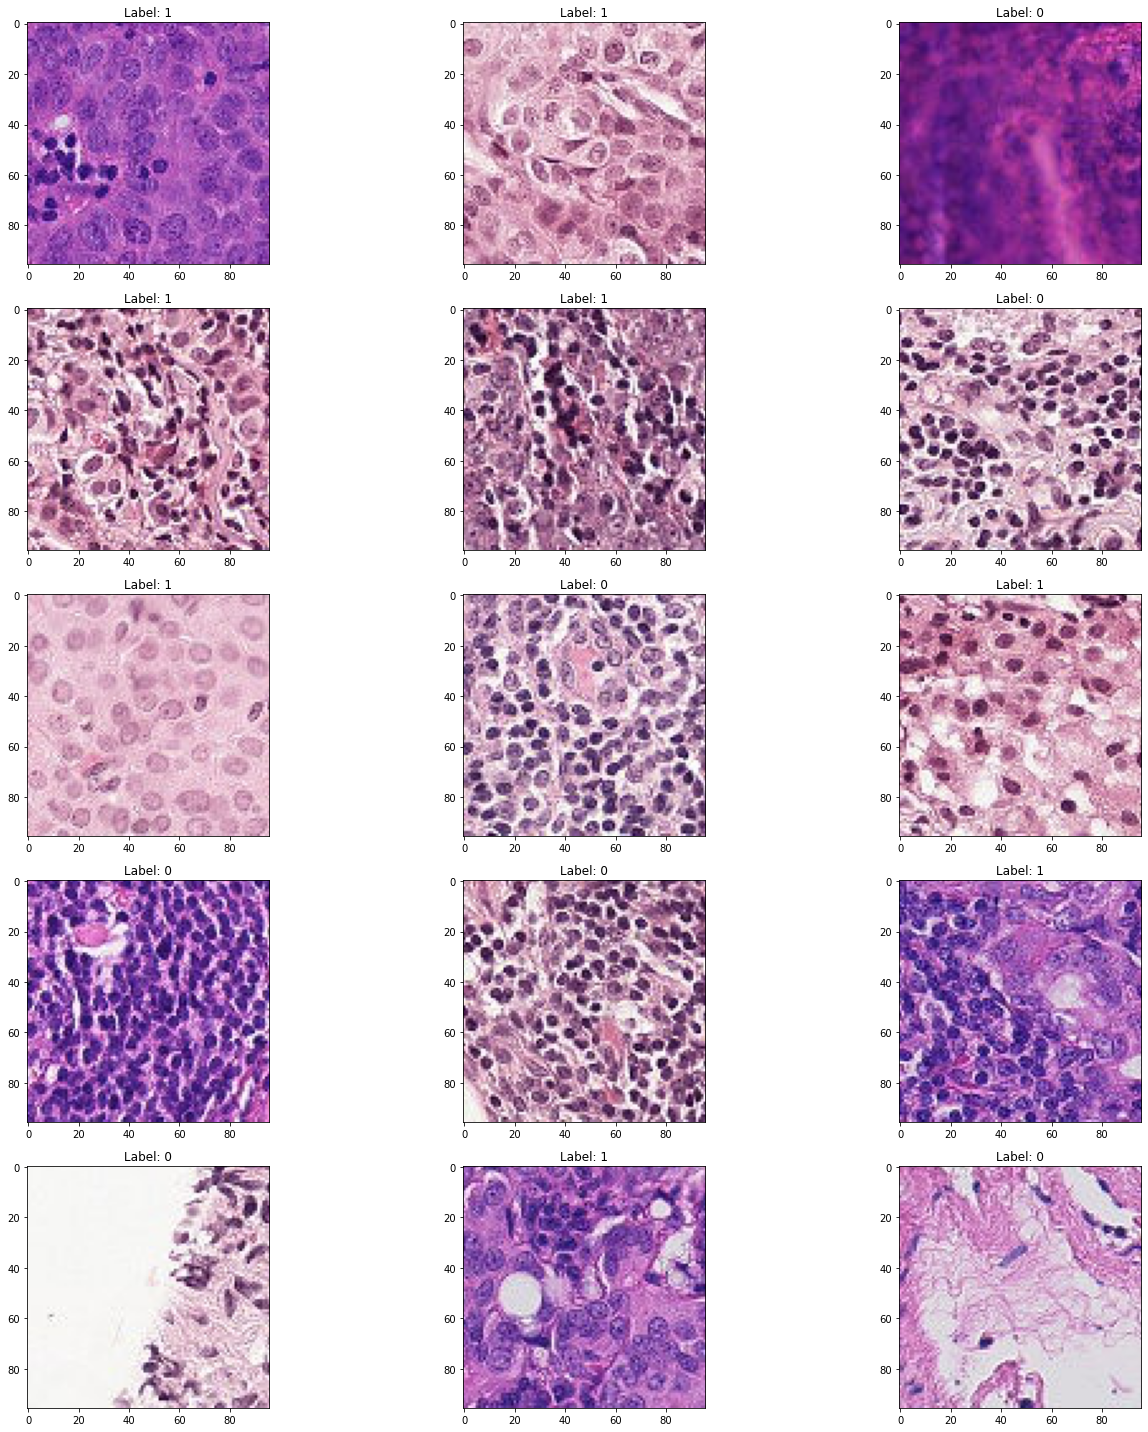

Found 133675 validated image filenames belonging to 2 classes.
Found 44559 validated image filenames belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        896       
                                                                 
 activation (Activation)     (None, 96, 96, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 94, 94, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 94, 94, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 92, 92, 32)        9248      
                                                                 
 activation_2 (Activation)   (None, 92, 92, 32)        0       

C:\Users\stonburinthip\AppData\Local\Temp\ipykernel_16556\4060627832.py:154: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model2.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_generator,validation_steps=STEP_SIZE_VALID, epochs=30, verbose=1, callbacks=[EarlyStopping(monitor='loss', patience=1)])


Epoch 1/30
2088/2088 [==============================] - 10766s 5s/step - loss: 0.4464 - accuracy: 0.8025 - val_loss: 0.8818 - val_accuracy: 0.5655
Epoch 2/30
2088/2088 [==============================] - 10496s 5s/step - loss: 0.3812 - accuracy: 0.8386 - val_loss: 1.2822 - val_accuracy: 0.5567
Epoch 3/30
2088/2088 [==============================] - 10445s 5s/step - loss: 0.3521 - accuracy: 0.8529 - val_loss: 0.5879 - val_accuracy: 0.7214
Epoch 4/30
2088/2088 [==============================] - 10353s 5s/step - loss: 0.3206 - accuracy: 0.8681 - val_loss: 0.3564 - val_accuracy: 0.8478
Epoch 5/30
2088/2088 [==============================] - 10028s 5s/step - loss: 0.3011 - accuracy: 0.8784 - val_loss: 0.3511 - val_accuracy: 0.8355
Epoch 6/30
2088/2088 [==============================] - 9991s 5s/step - loss: 0.2738 - accuracy: 0.8906 - val_loss: 0.2817 - val_accuracy: 0.8897
Epoch 7/30
2088/2088 [==============================] - 9997s 5s/step - loss: 0.2568 - accuracy: 0.8984 - val_loss: 0.5

KeyboardInterrupt: 

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jul 12 10:45:12 2022

@author: STonburinthip
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.layers import PReLU
from keras.initializers import Constant
from keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

train_labels = pd.read_csv('train_labels.csv', dtype=str)

label_list=train_labels['label'].astype("category").tolist()

#train_labels[['label']].value_counts().plot(kind='pie')

#Split
train_labels_pos = train_labels[train_labels['label']=='1']
train_labels_neg = train_labels[train_labels['label']=='0']

#take a random sample of the neg labels of the same size as the set of pos labels
train_labels_neg=train_labels_neg.sample(n=train_labels_pos.shape[0])

train_labels_balanced=pd.concat([train_labels_pos,train_labels_neg],axis=0).sample(frac=1,random_state=42).reset_index(drop=True)

#image
path="C:\\Users\\stonburinthip\\Downloads\\New folder\\histopathologic-cancer-detection\\train\\"+ train_labels_balanced.iloc[47,0] + '.tif'
img = mpimg.imread(path)
imgplot = plt.imshow(img)


#Check photo
sample_imgs=np.random.choice(train_labels_balanced.index,15)
fig,ax=plt.subplots(5,3,figsize=(20,20))

for i in range(0,sample_imgs.shape[0]):
    ax=plt.subplot(5,3,i+1)
    img=mpimg.imread("C:\\Users\\stonburinthip\\Downloads\\New folder\\histopathologic-cancer-detection\\train\\"+ train_labels_balanced.iloc[sample_imgs[i],0] + '.tif')
    ax.imshow(img)
    lab=train_labels_balanced.iloc[sample_imgs[i],1]
    ax.set_title('Label: %s'%lab)
plt.tight_layout()
plt.show()

#Model Architecture
#Train/Test
#This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as 
#the proportion of values provided to parameter stratify.

train_df,valid_df=train_test_split(train_labels_balanced,test_size=0.25,random_state=42, stratify=train_labels_balanced.label)
train_df['id'] = train_df['id']+'.tif'
valid_df['id'] = valid_df['id']+'.tif'

#create the training and validation subsets

'''
Rescale is a value by which we will multiply the data before any other processing. 
Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our model to process 
(given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor 
(the description taken from https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)
'''

## ImageDataGenerator
#Generate batches of tensor image data with real-time data augmentation.

train_datagen=ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_dataframe(dataframe=train_df,directory="C:\\Users\\stonburinthip\\Downloads\\New folder\\histopathologic-cancer-detection\\train\\",
                x_col="id",y_col="label",batch_size=64,seed=1234,shuffle=True,
                class_mode="binary",target_size=(96,96))
valid_generator=train_datagen.flow_from_dataframe(dataframe=valid_df,directory="C:\\Users\\stonburinthip\\Downloads\\New folder\\histopathologic-cancer-detection\\train\\",
                x_col="id",y_col="label",batch_size=64,seed=1234,shuffle=True,
                class_mode="binary",target_size=(96,96))

#next model with 3 sets of 5 convolutional layers
model2=Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',input_shape=(96,96,3)))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())

model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())

model2.add(Flatten())
model2.add(Dropout(0.25))
model2.add(Dense(512, activation='relu'))

model2.add(Flatten())
model2.add(Dropout(0.25))
model2.add(Dense(256, activation='relu'))

model2.add(Flatten())
model2.add(Dropout(0.25))
model2.add(Dense(64, activation='relu'))

model2.add(Dropout(0.25))
model2.add(Dense(1, activation='sigmoid'))

opt=tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

print(model2.summary())

STEP_SIZE_TRAIN= train_generator.n/train_generator.batch_size
STEP_SIZE_VALID= valid_generator.n/valid_generator.batch_size

history2=model2.fit_generator(generator=train_generator, steps_per_epoch=STEP_SIZE_TRAIN, validation_data=valid_generator,validation_steps=STEP_SIZE_VALID, epochs=30, verbose=1, callbacks=[EarlyStopping(monitor='loss', patience=1)])


Reference:
https://www.kaggle.com/code/dayivy/cnn-cancer-detection-kaggle-mini-project